# Problem 2 Sample Code

This sample code is meant as a guide on how to use PyTorch and how to use the relevant model layers. This not a guide on how to design a network and the network in this example is intentionally designed to have poor performace.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

## Loading MNIST
The `torchvision` module contains links to many standard datasets. We can load the MNIST dataset into a `Dataset` object as follows:

In [2]:
train_dataset = datasets.MNIST('./data', train=True, download=True,  # Downloads into a directory ../data
                               transform=transforms.ToTensor())
test_dataset = datasets.MNIST('./data', train=False, download=False,  # No need to download again
                              transform=transforms.ToTensor())

The `Dataset` object is an iterable where each element is a tuple of (input `Tensor`, target):

In [3]:
print(len(train_dataset), type(train_dataset[0][0]), type(train_dataset[0][1]))

60000 <class 'torch.Tensor'> <class 'int'>


We can convert images to numpy arrays and plot them with matplotlib:

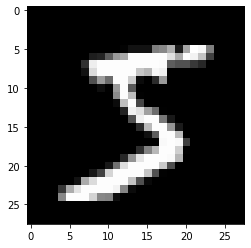

In [4]:
plt.imshow(train_dataset[0][0][0].numpy(), cmap='gray')

## Network Definition
Let's instantiate a model and take a look at the layers.

In [5]:
model = nn.Sequential(
    # In problem 2, we don't use the 2D structure of an image at all. Our network
    # takes in a flat vector of the pixel values as input.
    nn.Flatten(),  
    nn.Linear(784, 20),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(20, 10)
)
print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=20, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=20, out_features=10, bias=True)
)


## Training
We also choose an optimizer and a loss function.

In [6]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

We could write our training procedure manually and directly index the `Dataset` objects, but the `DataLoader` object conveniently creates an iterable for automatically creating random minibatches:

In [7]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True) 

We now write our backpropagation loop, training for 10 epochs.

In [8]:
# Some layers, such as Dropout, behave differently during training
model.train()

for epoch in range(10):
    for batch_idx, (data, target) in enumerate(train_loader):
        # Erase accumulated gradients
        optimizer.zero_grad()

        # Forward pass
        output = model(data)

        # Calculate loss
        loss = loss_fn(output, target)

        # Backward pass
        loss.backward()
        
        # Weight update
        optimizer.step()

    # Track loss each epoch
    print('Train Epoch: %d  Loss: %.4f' % (epoch + 1,  loss.item()))

Train Epoch: 1  Loss: 0.8564
Train Epoch: 2  Loss: 0.5108
Train Epoch: 3  Loss: 0.7519
Train Epoch: 4  Loss: 0.8041
Train Epoch: 5  Loss: 1.1123
Train Epoch: 6  Loss: 1.1183
Train Epoch: 7  Loss: 0.8658
Train Epoch: 8  Loss: 0.5306
Train Epoch: 9  Loss: 0.6301
Train Epoch: 10  Loss: 0.9893


## Testing
We can perform forward passes through the network without saving gradients.

In [9]:
# Putting layers like Dropout into evaluation mode
model.eval()

test_loss = 0
correct = 0

# Turning off automatic differentiation
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        test_loss += loss_fn(output, target).item()  # Sum up batch loss
        pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max class score
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(test_loader.dataset)

print('Test set: Average loss: %.4f, Accuracy: %d/%d (%.4f)' %
      (test_loss, correct, len(test_loader.dataset),
       100. * correct / len(test_loader.dataset)))

Test set: Average loss: 0.0090, Accuracy: 9219/10000 (92.1900)


# Problem A

In [3]:
!pip list | grep torch

torch                         1.10.0+cu111
torchaudio                    0.10.0+cu111
torchsummary                  1.5.1
torchtext                     0.11.0
torchvision                   0.11.1+cu111


# Problem B

In [4]:
train_dataset = datasets.MNIST('./data', train=True, download=True,  # Downloads into a directory ../data
                               transform=transforms.ToTensor())
test_dataset = datasets.MNIST('./data', train=False, download=False,  # No need to download again
                              transform=transforms.ToTensor())

In [5]:
print(len(train_dataset), type(train_dataset[0][0]), type(train_dataset[0][1]))

60000 <class 'torch.Tensor'> <class 'int'>


In [6]:
print(len(test_dataset))

10000


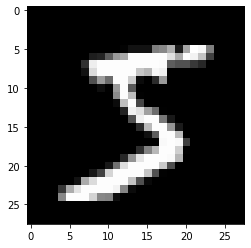

In [7]:
plt.imshow(train_dataset[0][0][0].numpy(), cmap='gray')

# Problem C

In [53]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 75),
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(75, 10),
)
# print(model)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32*6, 
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32*6, 
                                          shuffle=True) 

model.train()
for epoch in range(15):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
    # print('Train Epoch: %d  Loss: %.4f' % (epoch + 1,  loss.item()))

model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        test_loss += loss_fn(output, target).item() 
        pred = output.argmax(dim=1, keepdim=True)  
        correct += pred.eq(target.view_as(pred)).sum().item()
test_loss /= len(test_loader.dataset)
print('Test set: Average loss: %.4f, Accuracy: %d/%d (%.4f)' %
      (test_loss, correct, len(test_loader.dataset),
       100. * correct / len(test_loader.dataset)))

Test set: Average loss: 0.0004, Accuracy: 9764/10000 (97.6400)


# Problem D

In [55]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 150),
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(150, 75),
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(75, 10),
)
# print(model)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32*6, 
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32*6, 
                                          shuffle=True) 

model.train()
for epoch in range(15):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
    # print('Train Epoch: %d  Loss: %.4f' % (epoch + 1,  loss.item()))

model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        test_loss += loss_fn(output, target).item() 
        pred = output.argmax(dim=1, keepdim=True)  
        correct += pred.eq(target.view_as(pred)).sum().item()
test_loss /= len(test_loader.dataset)
print('Test set: Average loss: %.4f, Accuracy: %d/%d (%.4f)' %
      (test_loss, correct, len(test_loader.dataset),
       100. * correct / len(test_loader.dataset)))

Test set: Average loss: 0.0003, Accuracy: 9807/10000 (98.0700)


# Problem E

In [61]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 500),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(500, 400),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(400, 100),
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(100, 10),
)
# print(model)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32*6, 
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32*6, 
                                          shuffle=True) 

model.train()
for epoch in range(20):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
    # print('Train Epoch: %d  Loss: %.4f' % (epoch + 1,  loss.item()))

model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        test_loss += loss_fn(output, target).item() 
        pred = output.argmax(dim=1, keepdim=True)  
        correct += pred.eq(target.view_as(pred)).sum().item()
test_loss /= len(test_loader.dataset)
print('Test set: Average loss: %.4f, Accuracy: %d/%d (%.4f)' %
      (test_loss, correct, len(test_loader.dataset),
       100. * correct / len(test_loader.dataset)))

Test set: Average loss: 0.0003, Accuracy: 9854/10000 (98.5400)
